In [40]:
import numpy as np

### 3.1.3 Classification of samples that are not linearly separable

In [41]:
n = 100

# label a
mA = [5, 2]
sigma = 0.5
aX1 = np.random.normal(mA[0], sigma, n)
aX2 = np.random.normal(mA[1], sigma, n)
a = np.vstack((aX1, aX2, np.zeros(n)))
a.shape, a[:,:5]

((3, 100),
 array([[5.23544926, 5.73269517, 5.2812156 , 5.5776569 , 5.15280813],
        [2.50941403, 1.78936585, 1.91303174, 2.27918695, 2.16942426],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]))

In [42]:
# label b
mB = [5, 3]
bX1 = np.random.normal(mB[0], sigma, n)
bX2 = np.random.normal(mB[1], sigma, n)
b = np.vstack((bX1, bX2, np.ones(n)))
b.shape, b[:,:5]

((3, 100),
 array([[4.94877719, 5.25647027, 5.26490486, 5.51104609, 4.5147645 ],
        [3.37539677, 4.10265431, 3.05996301, 2.74101573, 2.5235141 ],
        [1.        , 1.        , 1.        , 1.        , 1.        ]]))

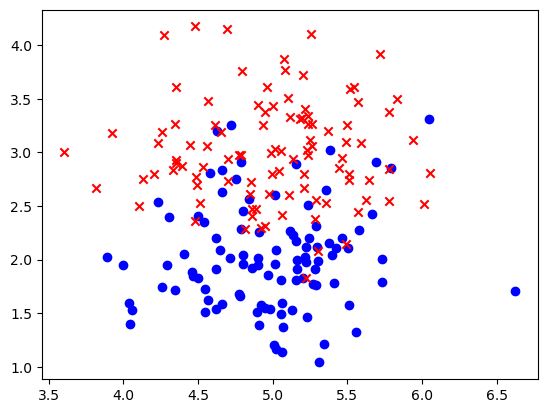

In [43]:
import matplotlib.pyplot as plt
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')

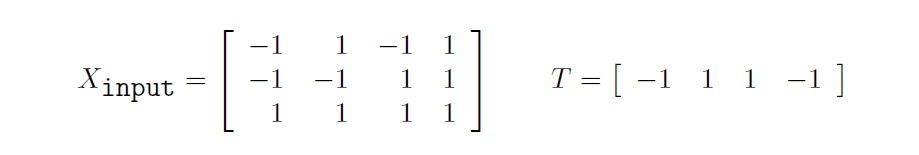

In [44]:
dataset = np.hstack((a,b))
dataset[:,:5], dataset.shape

(array([[5.23544926, 5.73269517, 5.2812156 , 5.5776569 , 5.15280813],
        [2.50941403, 1.78936585, 1.91303174, 2.27918695, 2.16942426],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]),
 (3, 200))

In [45]:
dataset

array([[5.23544926, 5.73269517, 5.2812156 , 5.5776569 , 5.15280813,
        4.79808028, 5.37511826, 5.05712137, 4.04793096, 4.85856055,
        5.06506991, 4.30749188, 4.89638196, 5.22624897, 4.72348393,
        5.38424109, 4.90666623, 4.61839583, 5.01646589, 6.62416557,
        5.02080684, 4.26154417, 5.50364181, 4.65752338, 5.79227536,
        5.34594018, 5.16429718, 4.79015704, 4.05811093, 5.29385173,
        5.06130225, 5.24195543, 4.49937547, 4.90003523, 4.79994221,
        5.0551626 , 5.01953701, 5.28949881, 4.61809911, 5.22518402,
        4.77356545, 4.78883826, 5.4630301 , 4.29469129, 4.90494178,
        5.28964518, 5.16412845, 5.21516213, 5.35672156, 5.5597644 ,
        4.65870183, 5.3076502 , 4.4634009 , 4.95113412, 4.57017377,
        5.39667757, 4.9104924 , 5.23227632, 5.06855585, 4.54725752,
        4.54054088, 5.50916298, 5.01586502, 5.6635662 , 5.00759185,
        4.71540509, 4.57731433, 5.68954147, 5.20015242, 4.34330508,
        4.65768838, 4.64554404, 4.03963216, 5.41

In [46]:
# shuffling the dataset horizontally...
rng = np.random.default_rng()
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[4.90666623, 4.86180374, 4.30749188, 5.06506991, 5.72144767],
       [2.25744005, 2.40225954, 2.40143676, 1.59294232, 3.9135873 ],
       [0.        , 1.        , 0.        , 0.        , 1.        ]])

In [47]:
dataset = np.vstack((np.ones(2*n), dataset))
dataset.shape, dataset[:,:5]

((4, 200),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [4.90666623, 4.86180374, 4.30749188, 5.06506991, 5.72144767],
        [2.25744005, 2.40225954, 2.40143676, 1.59294232, 3.9135873 ],
        [0.        , 1.        , 0.        , 0.        , 1.        ]]))

In [48]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 200), (200,))

The weights are stored in matrix W with as many columns as the dimensionality of the input patterns and with the number of rows matching the number of the
outputs (dimensionality of the output).

----------

### Part 1
Apply and compare perceptron learning and the delta rules using either batch or sequential learning mode, similarly as in the previous exercise (p.1, section 3.1.2).

**Perceptron Learning Principle**: weights are changed whenever a pattern is misclassified

In [49]:
class PerceptronLearningClassifier:
    def __init__(self, learning_rate):
        self.W = np.random.rand(3)
        self.learning_rate = learning_rate
        self.epochs = 0

    def predict(self, X):
        #print(np.array((self.W @ X) > 0, dtype=int))
        return np.array((self.W @ X) > 0, dtype=int)

    def fit(self, X, y, n_epochs, batch_size = 0):
        if (batch_size == 0):
            for i in range(0, n_epochs):
                predictions = self.predict(X)
                e = y_train - predictions
                dW = self.learning_rate * (e @ X.T)
                self.W += dW

                nErrors = np.sum( np.array(e != 0, dtype=int) )
                print("After {} epochs: {} errors".format(self.epochs, nErrors))
                self.epochs += 1
                if (nErrors == 0):
                    return True
            return False
                

    def fit_one_epoch(self, X, y):
        nErrors = 0
        for i in range(0, X.shape[1]):
            prediction = np.array((self.W @ X[:,i]) > 0, dtype=int)
            e = y[i] - prediction
            if (e != 0):
                nErrors += 1
            dW = self.learning_rate * (e * X[:,i])
            self.W = self.W + dW
        print("Errors this epoch:" + str(nErrors))

In [50]:
p1 = PerceptronLearningClassifier(0.1)

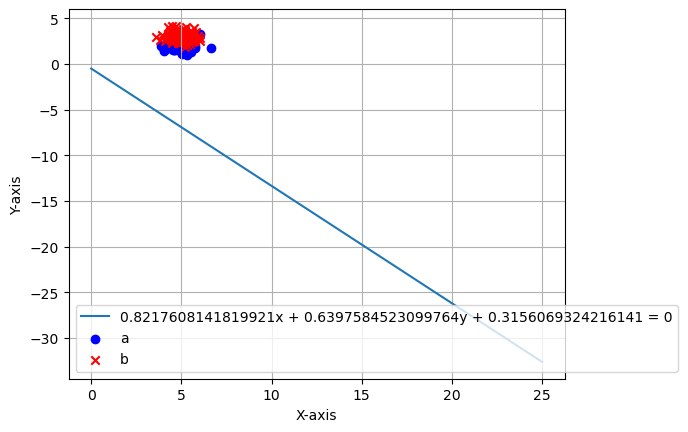

[0.31560693 0.82176081 0.63975845]


In [51]:
x = np.linspace(0, 25, 10)
a = p1.W[1]
b = p1.W[2]
c = p1.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p1.W)

After 0 epochs: 100 errors
After 1 epochs: 100 errors
After 2 epochs: 100 errors
After 3 epochs: 100 errors
After 4 epochs: 100 errors
After 5 epochs: 100 errors
After 6 epochs: 100 errors
After 7 epochs: 100 errors
After 8 epochs: 100 errors
After 9 epochs: 100 errors
After 10 epochs: 100 errors
After 11 epochs: 100 errors
After 12 epochs: 100 errors
After 13 epochs: 100 errors
After 14 epochs: 100 errors
After 15 epochs: 100 errors
After 16 epochs: 100 errors
After 17 epochs: 95 errors
After 18 epochs: 100 errors
After 19 epochs: 90 errors
After 20 epochs: 100 errors
After 21 epochs: 89 errors
After 22 epochs: 100 errors
After 23 epochs: 90 errors
After 24 epochs: 100 errors
After 25 epochs: 90 errors
After 26 epochs: 100 errors
After 27 epochs: 90 errors
After 28 epochs: 100 errors
After 29 epochs: 89 errors
After 30 epochs: 99 errors
After 31 epochs: 89 errors
After 32 epochs: 96 errors
After 33 epochs: 87 errors
After 34 epochs: 94 errors
After 35 epochs: 84 errors
After 36 epochs

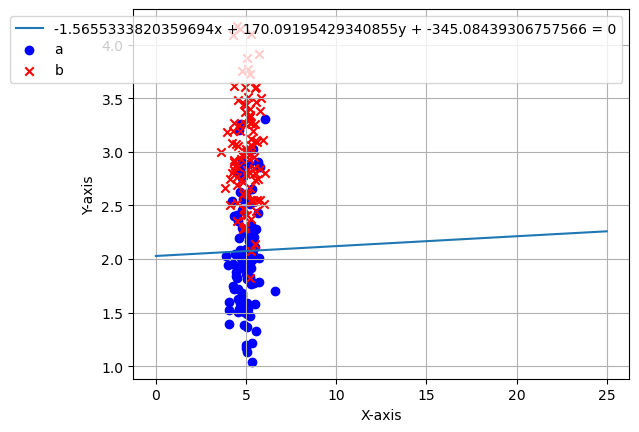

[-345.08439307   -1.56553338  170.09195429]


In [52]:
while (p1.fit(X_train, y_train, 1) == False):
    if (p1.epochs > 5000):
        print("No convergence after 5000 epochs...")
        break
    pass

x = np.linspace(0, 25, 10)
a = p1.W[1]
b = p1.W[2]
c = p1.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p1.W)

------------